In [1]:
#to process text data import this lib
import xmltodict

In [2]:
#get text data and verify that it is working properly
xml = 'RawDataFolder/sms-20180303224019.xml'
#with open(xml, 'rb') as xmldoc:
xmldoc = open(xml, 'rb')
raw_texts = xmltodict.parse(xmldoc)
#print(raw_texts['smses'].keys())
#for text in raw_texts['smses']['sms'][:3]:
#    print(text)

In [3]:
#set up libs and options
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

test Myers Briggs data

In [4]:
import pandas as pd
reddit_text = pd.read_csv('RawDataFolder/Reddit_mbti_data_2.csv',encoding='utf-8').set_index('Name')

In [5]:
reddit_text_filler = pd.read_csv('RawDataFolder/Reddit_mbti_data_filler.csv',encoding='utf-8').set_index('Name')

In [6]:
#import mbti data from kaggle
Meyers_text = pd.read_csv('RawDataFolder/mbti_1.csv')

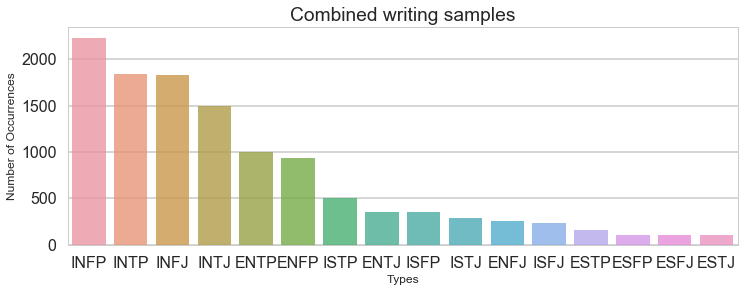

In [8]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [9]:
combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INFP    2237
INTP    1844
INFJ    1836
INTJ    1500
ENTP    1005
ENFP     933
ISTP     498
ENTJ     350
ISFP     350
ISTJ     282
ENFJ     256
ISFJ     238
ESTP     160
ESFP     102
ESFJ     102
ESTJ     101
dtype: int64


In [11]:
cnt_srs = reddit_text[reddit_text.text_count<40].mbti.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INTP    83
INTJ    73
INFJ    65
INFP    64
ENTP    44
ENFP    40
ISTP    31
ENTJ    23
ISFJ    21
ISFP    15
ENFJ    14
ESTP    12
ESFP    10
ISTJ     9
ESFJ     8
ESTJ     8
Name: mbti, dtype: int64


In [12]:
print(reddit_text.drop('text', axis=1)[reddit_text.text_count<50])

                      mbti  text_count
Name                                  
sweetsleeper          INTP        37.0
CleanDevelopment      ISTP        15.0
FunEquivalent         ISFP        34.0
Ayumu916              INFP        29.0
anacmelo              INTJ        25.0
suzythecreator        ISTP        28.0
magdaUl               ENTP         5.0
TheBureaucratJosephK  INTJ        40.0
analysis_god          INTP        34.0
PM-me-ur-MBTI-quirk   INFJ         7.0
Pos_Ki                INTJ        23.0
SousanTheMage         INTP        36.0
EffectiveEdge         ENFP         9.0
dashing-rainbows      ISTJ        29.0
Blissnoir             ISFJ        21.0
lle-ell               ENTP        47.0
IdealisticDegenerate  ENFP        17.0
TRlLLS                ENTJ        18.0
Plaid_Warlock         INTJ         8.0
arcticsehnsucht       INFP        39.0
taco-kat              INFP        49.0
jerompe               ENFP         9.0
pariah_piranha        INFP        28.0
Struggling_Millenial  EST

In [13]:
Meyers_text = Meyers_text.rename(index=str, columns={"type": "mbti", "posts": "text"})
combined_data = reddit_text.append([Meyers_text, reddit_text_filler], ignore_index=True).fillna(50)

In [14]:
#randomly select 100 examples of each
combined_data_evened = combined_data.groupby('mbti').apply(lambda x: x.sample(100)).reset_index(drop=True)

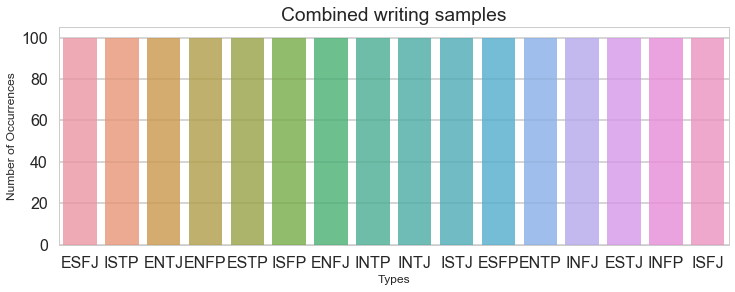

In [15]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = combined_data_evened.mbti.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [107]:
#split the data into test and training groups via mask
from sklearn.model_selection import train_test_split
_, itest_mbti = train_test_split(range(len(combined_data_evened['text'])), train_size=1)
mask_mbti = np.zeros(len(combined_data_evened['text']), dtype=np.bool)
mask_mbti[itest_mbti] = True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [147]:
#initialized text processing libs and vars
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer_mtbi = TfidfVectorizer(min_df=10,stop_words='english')
#vectorizer_mtbi = CountVectorizer(min_df=10,stop_words=‘english’)

In [148]:
#create arrays for results
y_IE = (combined_data_evened.mbti.str.contains('I') == 1).values.astype(np.int)
y_NS = (combined_data_evened.mbti.str.contains('N') == 1).values.astype(np.int)
y_TF = (combined_data_evened.mbti.str.contains('F') == 1).values.astype(np.int)
y_JP = (combined_data_evened.mbti.str.contains('J') == 1).values.astype(np.int)

In [149]:
#create one true results dataframe
y = pd.concat([pd.DataFrame(y_IE),pd.DataFrame(y_NS),pd.DataFrame(y_TF),pd.DataFrame(y_JP)], \
              keys = ['y_IE','y_NS','y_TF','y_JP'],axis=1)

print(combined_data_evened.mbti[:5])
print(y[:5])

0    ENFJ
1    ENFJ
2    ENFJ
3    ENFJ
4    ENFJ
Name: mbti, dtype: object
  y_IE y_NS y_TF y_JP
     0    0    0    0
0    0    1    1    1
1    0    1    1    1
2    0    1    1    1
3    0    1    1    1
4    0    1    1    1


In [150]:
#preprocess all the mbti data
import re

#add a removal of all mtbi classes                                                 <-change
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub(r'INTP', r'<MBTI>', text)
    text = re.sub(r'intp', r'<MBTI>', text)
    text = re.sub(r'INTJ', r'<MBTI>', text)
    text = re.sub(r'intj', r'<MBTI>', text)
    text = re.sub(r'INFJ', r'<MBTI>', text)
    text = re.sub(r'infj', r'<MBTI>', text)
    text = re.sub(r'INFP', r'<MBTI>', text)
    text = re.sub(r'infp', r'<MBTI>', text)
    text = re.sub(r'ENTP', r'<MBTI>', text)
    text = re.sub(r'entp', r'<MBTI>', text)
    text = re.sub(r'ENFP', r'<MBTI>', text)
    text = re.sub(r'enfp', r'<MBTI>', text)
    text = re.sub(r'ISTP', r'<MBTI>', text)
    text = re.sub(r'istp', r'<MBTI>', text)
    text = re.sub(r'ENTJ', r'<MBTI>', text)
    text = re.sub(r'entj', r'<MBTI>', text)
    text = re.sub(r'ISFJ', r'<MBTI>', text)
    text = re.sub(r'isfj', r'<MBTI>', text)
    text = re.sub(r'ENFJ', r'<MBTI>', text)
    text = re.sub(r'enfj', r'<MBTI>', text)
    text = re.sub(r'ISFP', r'<MBTI>', text)
    text = re.sub(r'isfp', r'<MBTI>', text)
    text = re.sub(r'ESFP', r'<MBTI>', text)
    text = re.sub(r'esfp', r'<MBTI>', text)
    text = re.sub(r'ESTP', r'<MBTI>', text)
    text = re.sub(r'estp', r'<MBTI>', text)
    text = re.sub(r'ESTJ', r'<MBTI>', text)
    text = re.sub(r'estj', r'<MBTI>', text)
    text = re.sub(r'ESFJ', r'<MBTI>', text)
    text = re.sub(r'esfj', r'<MBTI>', text)
    text = re.sub(r'ISTJ', r'<MBTI>', text)
    text = re.sub(r'istj', r'<MBTI>', text)
    return text
combined_data_evened['clean_text'] = combined_data_evened['text'].apply(cleanText)
#print(combined_data_evened['clean_text'][0])

In [151]:
#preform the data split
X = vectorizer_mtbi.fit_transform(combined_data_evened['clean_text'])

xtrain=X[mask_mbti]
ytrain=y[mask_mbti]
xtest=X[~mask_mbti]
ytest=y[~mask_mbti]

In [152]:
#check accuracy of each model on the saved training data
clf_IE = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_IE'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_IE.score(xtrain, ytrain['y_IE'])
test_accuracy = clf_IE.score(xtest, ytest['y_IE'])
from sklearn.metrics import precision_recall_fscore_support

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.923077
Accuracy on test data:     0.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
clf_NS = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_NS'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_NS.score(xtrain, ytrain['y_NS'])
test_accuracy = clf_NS.score(xtest, ytest['y_NS'])

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.882427
Accuracy on test data:     1.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
clf_TF = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_TF'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_TF.score(xtrain, ytrain['y_TF'])
test_accuracy = clf_TF.score(xtest, ytest['y_TF'])

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.854909
Accuracy on test data:     1.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
clf_JP = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_JP'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_JP.score(xtrain, ytrain['y_JP'])
test_accuracy = clf_JP.score(xtest, ytest['y_JP'])

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.918699
Accuracy on test data:     1.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
#find all my text
raw_text_friend = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((message['@date_sent']=='0') and (message['@contact_name']=='Mom') and (message['@body'] != '')):
        raw_text_friend.append(message['@body']) 
print(raw_text_friend[1:3])
raw_text_series_friend = pd.Series(raw_text_friend)

['Will you be home soon?', 'Yeah!']


add a pre-processing step!

In [157]:
raw_text_series_friend = raw_text_series_friend.apply(cleanText)
print(raw_text_series_friend[1:3])

1    Will you be home soon?
2                     Yeah!
dtype: object


In [158]:
#test predictions for my texts
#vected_sms_meyers = vectorizer.transform(raw_text_series)
vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)

In [159]:
IE_prediction = clf_IE.predict(vected_sms_meyers)
print('0=E and 1=I: ',(np.sum(IE_prediction)/len(IE_prediction)))

0=E and 1=I:  0.359375


In [160]:
NS_prediction = clf_NS.predict(vected_sms_meyers)
print('0=S and 1=N: ',(np.sum(NS_prediction)/len(NS_prediction)))

0=S and 1=N:  0.244419642857


In [161]:
TF_prediction = clf_TF.predict(vected_sms_meyers)
print('0=T and 1=F: ',(np.sum(TF_prediction)/len(TF_prediction)))

0=T and 1=F:  0.762276785714


In [162]:
JP_prediction = clf_JP.predict(vected_sms_meyers)
print('0=P and 1=J: ',(np.sum(JP_prediction)/len(JP_prediction)))

0=P and 1=J:  0.5859375


In [163]:
#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and text['@date_sent']=='0'):
        People.append(text['@contact_name'])
        #print(text)
#print(People)

In [164]:
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((message['@date_sent']=='0') and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
#raw_text_series_friend = pd.Series(raw_text_friends)

In [165]:
#classify the average from each of my friends
from collections import defaultdict
friend_mbti_personalities = defaultdict(list)
for person in People:
    mbti_string = ''
    raw_text_series_friend = pd.Series(raw_text_friends[person])
    raw_text_series_friend = raw_text_series_friend.apply(cleanText)
    vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)
    
    IE_prediction = clf_IE.predict(vected_sms_meyers)
    if ((np.sum(IE_prediction)/len(IE_prediction))>.5):
        mbti_string = mbti_string +'I'
    else:
        mbti_string = mbti_string +'E'
        
    NS_prediction = clf_NS.predict(vected_sms_meyers)
    if ((np.sum(NS_prediction)/len(NS_prediction))>.5):
        mbti_string = mbti_string +'N'
    else:
        mbti_string = mbti_string +'S'
    
    TF_prediction = clf_TF.predict(vected_sms_meyers)
    if ((np.sum(TF_prediction)/len(TF_prediction))>.5):
        mbti_string = mbti_string +'F'
    else:
        mbti_string = mbti_string +'T'
        
    JP_prediction = clf_JP.predict(vected_sms_meyers)
    if ((np.sum(JP_prediction)/len(JP_prediction))>.5):
        mbti_string = mbti_string +'J'
    else:
        mbti_string = mbti_string +'P'  
        
    #print(person, ' is ',  mbti_string)
    #print(len(pd.Series(raw_text_friends[person])))
    friend_mbti_personalities[person].append(mbti_string)
    friend_mbti_personalities[person].append(len(pd.Series(raw_text_friends[person])))

In [166]:
#display each persons MBTI classification from their texts and the count of texts that it is based off of
pd.options.display.max_rows = 30
out = pd.DataFrame.from_dict(friend_mbti_personalities,orient='index')
out.columns = ['MBTI','Text_Count']
print(out.sort_values('Text_Count',ascending=False).reset_index(drop=True))

     MBTI  Text_Count
0    ESFJ       22908
1    ESFP        3961
2    ESFP        1004
3    ESFJ         996
4    ESFJ         896
5    ESFJ         626
6    ESFJ         537
7    ESFJ         465
8    ESFP         420
9    ESFP         384
10   ESFJ         354
11   ESTJ         340
12   ESFP         290
13   ESFP         264
14   ESFP         221
..    ...         ...
146  ISFP           1
147  ESFJ           1
148  ENFP           1
149  ESFJ           1
150  ENFP           1
151  ESFJ           1
152  ISFP           1
153  ESFJ           1
154  INFP           1
155  ESFP           1
156  ESFP           1
157  ESFJ           1
158  ENFJ           1
159  ESFP           1
160  INFJ           1

[161 rows x 2 columns]


In [167]:
#show words that are the most polarized in introverted vs extroverted
words = np.array(vectorizer_mtbi.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf_IE.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Introverted words\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Extroverted words\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Introverted words	     P(Introverted | Extroverted)
                niss 0.73
                cats 0.71
                anna 0.70
          melancholy 0.68
                rave 0.67
               peter 0.67
              lyrics 0.67
                rant 0.66
                 ___ 0.66
                deck 0.66
Extroverted words	     P(Introverted | Extroverted)
                 9w8 0.35
                 7w8 0.34
                 mma 0.34
                 7w6 0.34
                 2w3 0.33
           president 0.33
                estp 0.33
                 000 0.32
                 3w2 0.31
                enfp 0.30
